In [1]:
# Install required libraries
!pip install pandas numpy matplotlib seaborn scikit-learn tensorflow keras imbalanced-learn xgboost

# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, RandomForestClassifier
from sklearn.svm import SVR, SVC
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings('ignore')


In [2]:
import pandas as pd  # Make sure to import pandas first

# Read the Excel file - specify sheet_name as a string or index
warfarin_data = pd.read_excel('PS206767-553247439.xls', sheet_name='Subject Data')  # Adjust sheet name as needed

# Display the first few rows
print(warfarin_data.head())

  PharmGKB Subject ID PharmGKB Sample ID  Project Site  Gender  \
0         PA135312261        PA135312629             1    male   
1         PA135312262        PA135312630             1  female   
2         PA135312263        PA135312631             1  female   
3         PA135312264        PA135312632             1    male   
4         PA135312265        PA135312633             1    male   

  Race (Reported) Race (OMB)    Ethnicity (Reported)         Ethnicity (OMB)  \
0           White      White  not Hispanic or Latino  not Hispanic or Latino   
1           White      White  not Hispanic or Latino  not Hispanic or Latino   
2           White      White  not Hispanic or Latino  not Hispanic or Latino   
3           White      White  not Hispanic or Latino  not Hispanic or Latino   
4           White      White  not Hispanic or Latino  not Hispanic or Latino   

       Age  Height (cm)  ...  \
0  60 - 69      193.040  ...   
1  50 - 59      176.530  ...   
2  40 - 49      162.560  .

In [4]:
warfarin_data.head()

,PharmGKB Subject ID,PharmGKB Sample ID,Project Site,Gender,Race (Reported),Race (OMB),Ethnicity (Reported),Ethnicity (OMB),Age,Height (cm),...,VKORC1 QC genotype: -4451 C>A (861); Chr16:31018002; rs17880887; A/C,CYP2C9 consensus,VKORC1 -1639 consensus,VKORC1 497 consensus,VKORC1 1173 consensus,VKORC1 1542 consensus,VKORC1 3730 consensus,VKORC1 2255 consensus,VKORC1 -4451 consensus,Comments regarding Project Site Dataset
0,PA135312261,PA135312629,1,male,White,White,not Hispanic or Latino,not Hispanic or Latino,60 - 69,193.040,...,NaN,*1/*1,A/G,G/T,NaN,C/G,A/G,NaN,NaN,Project 1:
1,PA135312262,PA135312630,1,female,White,White,not Hispanic or Latino,not Hispanic or Latino,50 - 59,176.530,...,C/C,*1/*1,A/A,G/T,T/T,C/C,G/G,T/T,C/C,Warfarin Therapeutic Dose Definition:
2,PA135312263,PA135312631,1,female,White,White,not Hispanic or Latino,not Hispanic or Latino,40 - 49,162.560,...,NaN,*1/*1,G/G,T/T,NaN,G/G,A/G,NaN,NaN,The dose (unchanged for 6 days) that yielded a...
3,PA135312264,PA135312632,1,male,White,White,not Hispanic or Latino,not Hispanic or Latino,60 - 69,182.245,...,NaN,*1/*1,A/G,G/T,NaN,C/G,G/G,NaN,NaN,NaN
4,PA135312265,PA135312633,1,male,White,White,not Hispanic or Latino,not Hispanic or Latino,50 - 59,167.640,...,NaN,*1/*3,A/G,T/T,NaN,C/G,A/G,NaN,NaN,NaN


In [5]:
warfarin_data.columns

Index(['PharmGKB Subject ID', 'PharmGKB Sample ID', 'Project Site', 'Gender',
       'Race (Reported)', 'Race (OMB)', 'Ethnicity (Reported)',
       'Ethnicity (OMB)', 'Age', 'Height (cm)', 'Weight (kg)',
       'Indication for Warfarin Treatment', 'Comorbidities', 'Diabetes',
       'Congestive Heart Failure and/or Cardiomyopathy', 'Valve Replacement',
       'Medications', 'Aspirin', 'Acetaminophen or Paracetamol (Tylenol)',
       'Was Dose of Acetaminophen or Paracetamol (Tylenol) >1300mg/day',
       'Simvastatin (Zocor)', 'Atorvastatin (Lipitor)', 'Fluvastatin (Lescol)',
       'Lovastatin (Mevacor)', 'Pravastatin (Pravachol)',
       'Rosuvastatin (Crestor)', 'Cerivastatin (Baycol)',
       'Amiodarone (Cordarone)', 'Carbamazepine (Tegretol)',
       'Phenytoin (Dilantin)', 'Rifampin or Rifampicin',
       'Sulfonamide Antibiotics', 'Macrolide Antibiotics',
       'Anti-fungal Azoles', 'Herbal Medications, Vitamins, Supplements',
       'Target INR', 'Estimated Target INR Range 

In [6]:
warfarin_data.describe()

,Project Site,Height (cm),Weight (kg),Diabetes,Congestive Heart Failure and/or Cardiomyopathy,Valve Replacement,Aspirin,Acetaminophen or Paracetamol (Tylenol),Was Dose of Acetaminophen or Paracetamol (Tylenol) >1300mg/day,Simvastatin (Zocor),...,Rifampin or Rifampicin,Sulfonamide Antibiotics,Macrolide Antibiotics,Anti-fungal Azoles,"Herbal Medications, Vitamins, Supplements",Target INR,Subject Reached Stable Dose of Warfarin,Therapeutic Dose of Warfarin,INR on Reported Therapeutic Dose of Warfarin,Current Smoker
count,5700.000000,4554.000000,5413.000000,3283.000000,4012.000000,3958.000000,3840.000000,2274.000000,1159.000000,3861.000000,...,2423.000000,2422.000000,2423.000000,2426.000000,1908.000000,1259.000000,5651.000000,5528.000000,4968.000000,3220.000000
mean,9.555965,168.047778,77.852569,0.187024,0.183699,0.256443,0.238542,0.220317,0.006040,0.146335,...,0.001651,0.006193,0.002476,0.007007,0.482704,2.538324,0.960007,30.977887,2.364438,0.139441
std,6.340864,10.845992,21.859764,0.389990,0.387287,0.436724,0.426247,0.414551,0.077514,0.353488,...,0.040605,0.078469,0.049711,0.083434,0.499832,0.198140,0.195960,16.801048,0.464644,0.346460
min,1.000000,124.968000,30.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.300000,0.000000,2.100000,0.800000,0.000000
25%,4.000000,160.020000,62.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,2.500000,1.000000,19.530000,2.100000,0.000000
50%,8.000000,167.894000,75.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,2.500000,1.000000,28.000000,2.400000,0.000000
75%,15.000000,176.022000,90.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,2.500000,1.000000,38.500000,2.610000,0.000000
max,21.000000,202.000000,237.700000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,3.500000,1.000000,315.000000,6.100000,1.000000


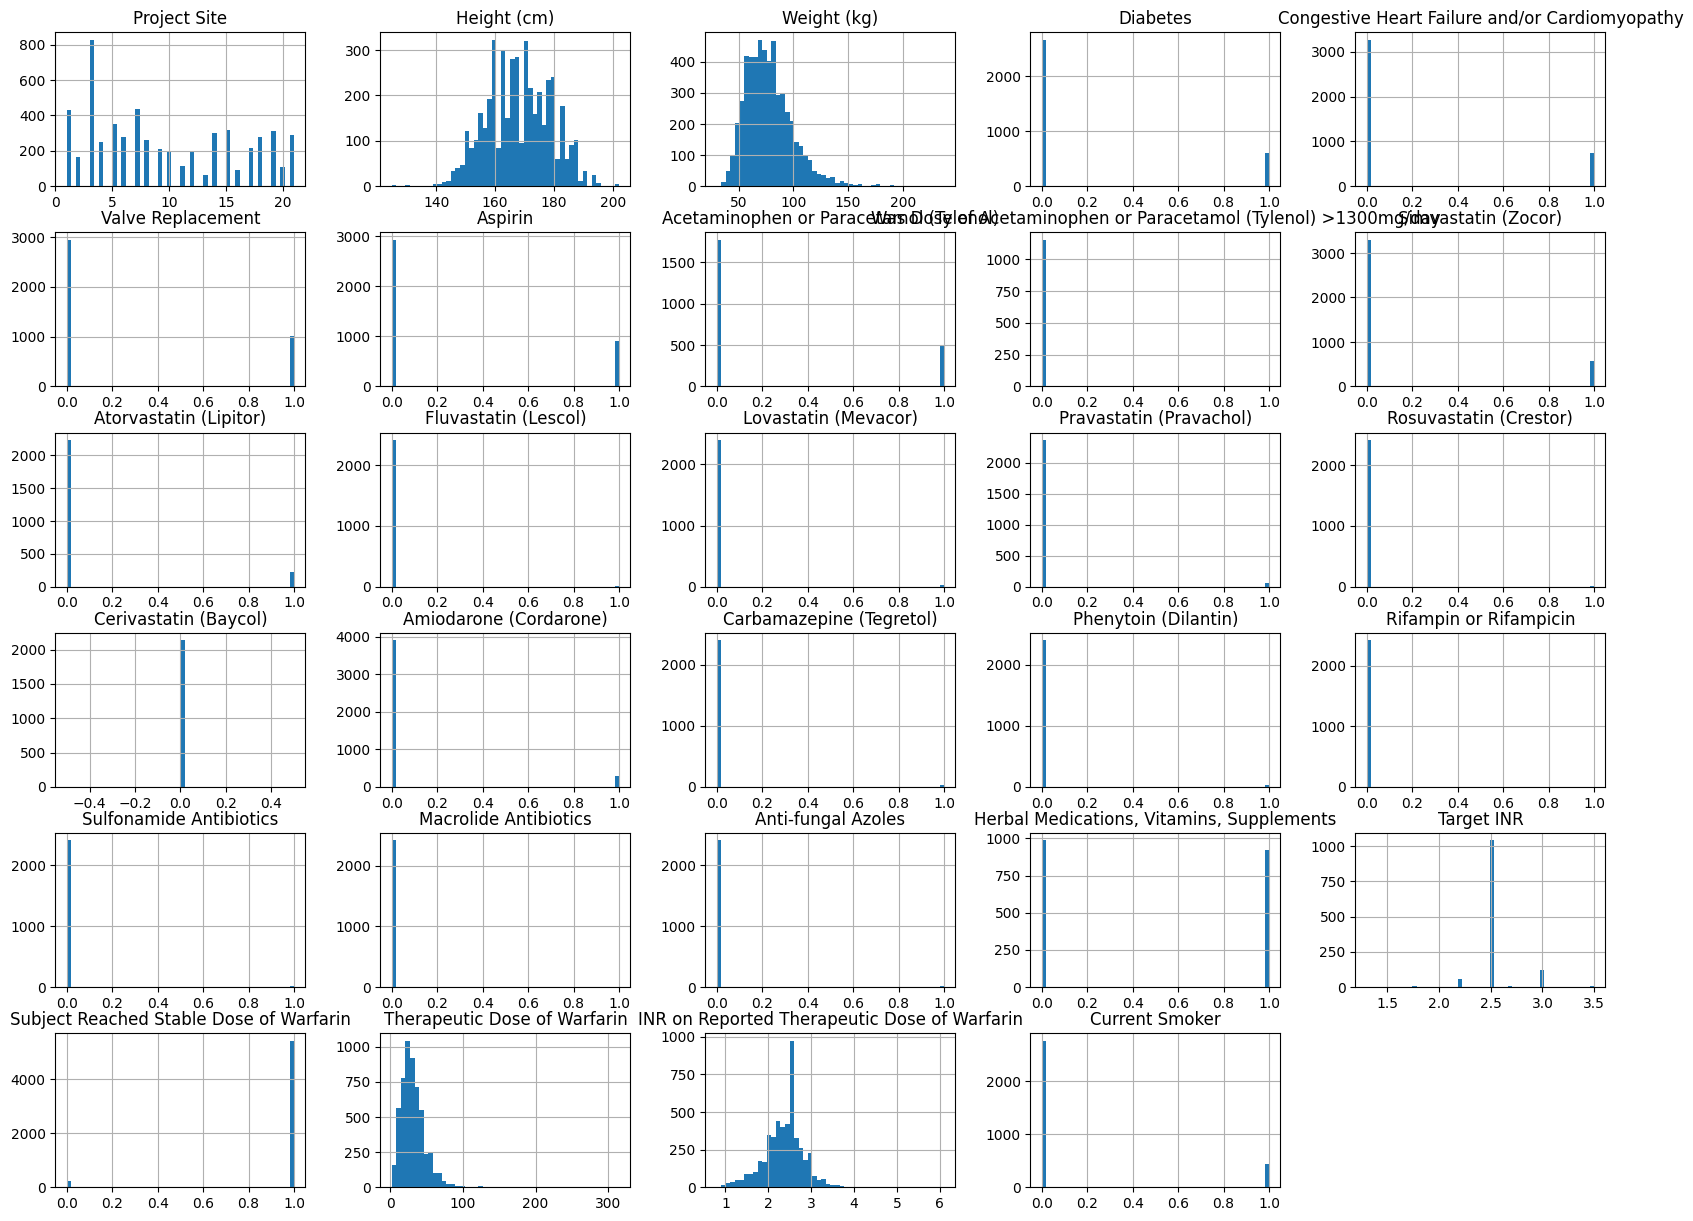

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
warfarin_data.hist(bins=50, figsize=(20,15))
plt.show()

In [8]:
np.random.seed(10)

In [9]:
# For illustration only. Sklearn has train_test_split()
def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [10]:
# run the function to get the train & test set
train_set, test_set = split_train_test(warfarin_data, 0.2)

In [11]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4560 entries, 5437 to 1289
Data columns (total 68 columns):
 #   Column                                                                Non-Null Count  Dtype  
---  ------                                                                --------------  -----  
 0   PharmGKB Subject ID                                                   4560 non-null   object 
 1   PharmGKB Sample ID                                                    4560 non-null   object 
 2   Project Site                                                          4560 non-null   int64  
 3   Gender                                                                4556 non-null   object 
 4   Race (Reported)                                                       4153 non-null   object 
 5   Race (OMB)                                                            4560 non-null   object 
 6   Ethnicity (Reported)                                                  3566 non-null   object 
 7  

In [12]:
# After identifying the correct column names, let's define our features and target
# These need to be adjusted based on the actual column names from the dataset

# First check for the correct therapeutic dose column name
dose_columns = [col for col in warfarin_data.columns if 'dose' in col.lower() or 'therapeutic' in col.lower()]
print("Possible therapeutic dose columns:", dose_columns)

# Now check for other feature columns
demographic_columns = [col for col in warfarin_data.columns if any(term in col.lower() for term in ['gender', 'age', 'race', 'height', 'weight'])]
print("Demographic columns:", demographic_columns)

medication_columns = [col for col in warfarin_data.columns if any(term in col.lower() for term in ['diabetes', 'simvastatin', 'amiodarone', 'inr', 'cyp2c9', 'vkorc1'])]
print("Medication and genetic columns:", medication_columns)

# Now define the features and target correctly
# Adjust these based on actual column names
target_regression = [col for col in dose_columns if 'therapeutic' in col.lower()][0]
print(f"Target regression column: {target_regression}")

# List of features - adjust based on your actual column names
features = demographic_columns + medication_columns
print(f"Features: {features}")

# Now display data types and missing values with correct column names
print("\nData types:")
warfarin_data[features + [target_regression]].info()

print("\nMissing values:")
print(warfarin_data[features + [target_regression]].isnull().sum())

# Descriptive statistics
print("\nDescriptive statistics:")
warfarin_data[features + [target_regression]].describe()

Possible therapeutic dose columns: ['Was Dose of Acetaminophen or Paracetamol (Tylenol) >1300mg/day', 'Subject Reached Stable Dose of Warfarin', 'Therapeutic Dose of Warfarin', 'INR on Reported Therapeutic Dose of Warfarin']
Demographic columns: ['Gender', 'Race (Reported)', 'Race (OMB)', 'Age', 'Height (cm)', 'Weight (kg)', 'Acetaminophen or Paracetamol (Tylenol)', 'Was Dose of Acetaminophen or Paracetamol (Tylenol) >1300mg/day']
Medication and genetic columns: ['Diabetes', 'Simvastatin (Zocor)', 'Amiodarone (Cordarone)', 'Target INR', 'Estimated Target INR Range Based on Indication', 'INR on Reported Therapeutic Dose of Warfarin', 'Cyp2C9 genotypes', 'Genotyped QC Cyp2C9*2', 'Genotyped QC Cyp2C9*3', 'Combined QC CYP2C9', 'VKORC1 genotype: -1639 G>A (3673); chr16:31015190; rs9923231; C/T', 'VKORC1 QC genotype: -1639 G>A (3673); chr16:31015190; rs9923231; C/T', 'VKORC1 genotype: 497T>G (5808); chr16:31013055; rs2884737; A/C', 'VKORC1 QC genotype: 497T>G (5808); chr16:31013055; rs288473

,Height (cm),Weight (kg),Acetaminophen or Paracetamol (Tylenol),Was Dose of Acetaminophen or Paracetamol (Tylenol) >1300mg/day,Diabetes,Simvastatin (Zocor),Amiodarone (Cordarone),Target INR,INR on Reported Therapeutic Dose of Warfarin,Therapeutic Dose of Warfarin
count,4554.000000,5413.000000,2274.000000,1159.000000,3283.000000,3861.000000,4182.000000,1259.000000,4968.000000,5528.000000
mean,168.047778,77.852569,0.220317,0.006040,0.187024,0.146335,0.066236,2.538324,2.364438,30.977887
std,10.845992,21.859764,0.414551,0.077514,0.389990,0.353488,0.248724,0.198140,0.464644,16.801048
min,124.968000,30.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.300000,0.800000,2.100000
25%,160.020000,62.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.500000,2.100000,19.530000
50%,167.894000,75.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.500000,2.400000,28.000000
75%,176.022000,90.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.500000,2.610000,38.500000
max,202.000000,237.700000,1.000000,1.000000,1.000000,1.000000,1.000000,3.500000,6.100000,315.000000


In [13]:
# Step 3: Data Preprocessing

# 3.1 Handle Missing Values
print("\n--- Handling Missing Values ---")

# First, replace any non-standard missing values with NaN
warfarin_data.replace(['NA', 'N/A', '-99', -99], np.nan, inplace=True)

# Check updated missing values count
print("Missing values after standardization:")
print(warfarin_data[features + [target_regression]].isnull().sum())

# 3.2 Impute missing values
# For numeric features
numeric_features = warfarin_data[features].select_dtypes(include=['int64', 'float64']).columns
for col in numeric_features:
    median_value = warfarin_data[col].median()
    warfarin_data[col].fillna(median_value, inplace=True)
    print(f"Imputed {col} with median: {median_value}")

# For categorical features
categorical_features = warfarin_data[features].select_dtypes(include=['object']).columns
for col in categorical_features:
    mode_value = warfarin_data[col].mode()[0]
    warfarin_data[col].fillna(mode_value, inplace=True)
    print(f"Imputed {col} with mode: {mode_value}")

# 3.3 Create binary classification target
# Following the project description, create HRD (>30 mg/wk) and LRD (≤30 mg/wk) classes
print("\n--- Creating Classification Target ---")
dose_threshold = 30  # mg/wk
warfarin_data['dose_class'] = (warfarin_data[target_regression] > dose_threshold).astype(int)
warfarin_data['dose_class'] = warfarin_data['dose_class'].map({1: 'HRD', 0: 'LRD'})
print(f"Dose class distribution: {warfarin_data['dose_class'].value_counts()}")

# 3.4 Check for outliers in numeric features
print("\n--- Checking for Outliers ---")
for col in numeric_features:
    q1 = warfarin_data[col].quantile(0.25)
    q3 = warfarin_data[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = warfarin_data[(warfarin_data[col] < lower_bound) | (warfarin_data[col] > upper_bound)][col]
    if not outliers.empty:
        print(f"Outliers in {col}: {len(outliers)} values")
        # You can decide whether to cap outliers, remove them, or keep them based on domain knowledge


--- Handling Missing Values ---
Missing values after standardization:
Gender                                                                     4
Race (Reported)                                                          506
Race (OMB)                                                                 0
Age                                                                       42
Height (cm)                                                             1146
Weight (kg)                                                              287
Acetaminophen or Paracetamol (Tylenol)                                  3426
Was Dose of Acetaminophen or Paracetamol (Tylenol) >1300mg/day          4541
Diabetes                                                                2417
Simvastatin (Zocor)                                                     1839
Amiodarone (Cordarone)                                                  1518
Target INR                                                              4441
Estim

In [14]:
# Step 4: Data Visualization and Exploratory Analysis

# 4.1 Visualize the distribution of the target variable
plt.figure(figsize=(10, 6))
plt.hist(warfarin_data[target_regression], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Therapeutic Dose of Warfarin')
plt.xlabel('Dose (mg/week)')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)
plt.savefig('dose_distribution.png')
plt.close()

# 4.2 Visualize the relationship between key features and the target
# Select a few important numeric features
key_numeric_features = numeric_features[:4]  # Adjust based on your data

plt.figure(figsize=(15, 10))
for i, feature in enumerate(key_numeric_features):
    plt.subplot(2, 2, i+1)
    plt.scatter(warfarin_data[feature], warfarin_data[target_regression], alpha=0.5)
    plt.title(f'{feature} vs Therapeutic Dose')
    plt.xlabel(feature)
    plt.ylabel('Therapeutic Dose (mg/week)')
    plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('feature_vs_dose.png')
plt.close()

# 4.3 Visualize the class distribution
plt.figure(figsize=(8, 6))
warfarin_data['dose_class'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Distribution of Dose Classes')
plt.xlabel('Dose Class')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(True, alpha=0.3, axis='y')
plt.savefig('dose_class_distribution.png')
plt.close()

# 4.4 Correlation heatmap for numeric features
corr_matrix = warfarin_data[list(numeric_features) + [target_regression]].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.tight_layout()
plt.savefig('correlation_heatmap.png')
plt.close()

print("Visualizations have been saved as PNG files.")

Visualizations have been saved as PNG files.


In [15]:
# 1. Start with cleaned features and proper target
X_filtered = warfarin_data.drop(columns=[target_regression, 'dose_class'] +
                               [col for col in warfarin_data.columns if
                                'dose' in col.lower() or
                                'therapeutic' in col.lower() or
                                'warfarin' in col.lower() or
                                'inr' in col.lower()])

# Keep only demographics and genetic features as mentioned in the project description
valid_features = ['Gender', 'Race (Reported)', 'Age', 'Height (cm)', 'Weight (kg)',
                 'Diabetes', 'Simvastatin (Zocor)', 'Amiodarone (Cordarone)',
                 'Cyp2C9 genotypes', 'VKORC1 genotype: -1639 G>A (3673); chr16:31015190; rs9923231; C/T']

X_filtered = X_filtered[[col for col in X_filtered.columns if any(feat in col for feat in valid_features)]]

# 2. Handle missing values and preprocess
numeric_features = X_filtered.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X_filtered.select_dtypes(include=['object', 'category']).columns.tolist()

# Process numeric features
numeric_imputer = SimpleImputer(strategy='median')
X_numeric = X_filtered[numeric_features].copy() if numeric_features else pd.DataFrame()
if not X_numeric.empty:
    X_numeric_imputed = pd.DataFrame(
        numeric_imputer.fit_transform(X_numeric),
        columns=numeric_features,
        index=X_numeric.index
    )

# Process categorical features
if categorical_features:
    cat_imputer = SimpleImputer(strategy='most_frequent')
    X_cat = X_filtered[categorical_features].copy()
    X_cat_imputed = pd.DataFrame(
        cat_imputer.fit_transform(X_cat),
        columns=categorical_features,
        index=X_cat.index
    )

    # One-hot encode categorical features
    X_cat_encoded = pd.get_dummies(X_cat_imputed, drop_first=True)

    # Combine numeric and categorical features
    X_processed = pd.concat([X_numeric_imputed, X_cat_encoded], axis=1) if not X_numeric.empty else X_cat_encoded
else:
    X_processed = X_numeric_imputed

# 3. Define target variables
y_reg = warfarin_data[target_regression].copy()
y_cls = (y_reg > 30).astype(int)  # Binary classification (>30 mg/wk = high dose)

# 4. Split data
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X_processed, y_reg, test_size=0.2, random_state=42)

X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(
    X_processed, y_cls, test_size=0.2, random_state=42)

In [16]:
# Step 6: Split Data for Modeling

# 6.1 Prepare data for both regression and classification tasks using processed data
print("\n--- Splitting Data for Modeling ---")

# Define the regression target (Update this column name if needed)
# You can also use: warfarin_data.columns to confirm the exact name
y_reg_imputed = warfarin_data['Therapeutic Dose of Warfarin']  # <-- Replace with actual column if different

# For regression task
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X_processed, y_reg_imputed, test_size=0.2, random_state=42
)

# For classification task - create the binary target first
dose_threshold = 30  # mg/week
y_cls = (y_reg_imputed > dose_threshold).astype(int)
print(f"Dose class distribution: {y_cls.value_counts()}")

# Split for classification
X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(
    X_processed, y_cls, test_size=0.2, random_state=42
)

# Print shapes
print(f"Training set size: {X_train_reg.shape[0]} samples")
print(f"Testing set size: {X_test_reg.shape[0]} samples")
print(f"Number of features: {X_train_reg.shape[1]}")



--- Splitting Data for Modeling ---
Dose class distribution: Therapeutic Dose of Warfarin
0    3296
1    2404
Name: count, dtype: int64
Training set size: 4560 samples
Testing set size: 1140 samples
Number of features: 47



--- Building Regression Models ---

Training Linear Regression...
Results for Linear Regression:
  Train MSE: 181.9974
  Test MSE: 145.7731
  Train RMSE: 13.4906
  Test RMSE: 12.0737
  Train MAE: 9.2498
  Test MAE: 8.8517
  Train R²: 0.3759
  Test R²: 0.4043
  CV RMSE: 13.6324

Training Ridge Regression...
Results for Ridge Regression:
  Train MSE: 182.1058
  Test MSE: 146.0475
  Train RMSE: 13.4947
  Test RMSE: 12.0850
  Train MAE: 9.2565
  Test MAE: 8.8588
  Train R²: 0.3755
  Test R²: 0.4031
  CV RMSE: 13.6244

Training Lasso Regression...
Results for Lasso Regression:
  Train MSE: 191.7559
  Test MSE: 154.8631
  Train RMSE: 13.8476
  Test RMSE: 12.4444
  Train MAE: 9.5593
  Test MAE: 9.1486
  Train R²: 0.3424
  Test R²: 0.3671
  CV RMSE: 13.9295

Training Decision Tree...
Results for Decision Tree:
  Train MSE: 2.9176
  Test MSE: 421.7495
  Train RMSE: 1.7081
  Test RMSE: 20.5365
  Train MAE: 0.2692
  Test MAE: 13.7100
  Train R²: 0.9900
  Test R²: -0.7236
  CV RMSE: 19.4312

Trai

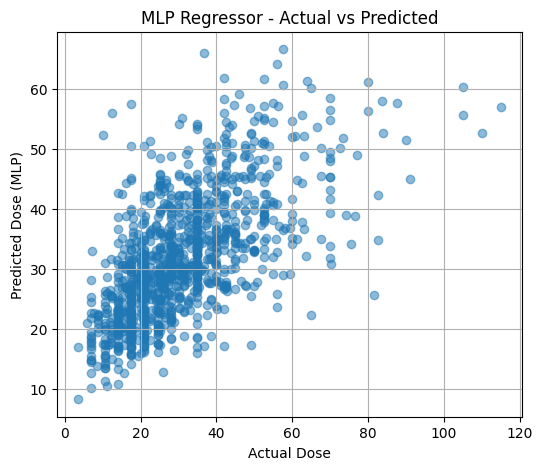

In [17]:
# Clean target variable before modeling
y_reg_imputed = warfarin_data['Therapeutic Dose of Warfarin']  # Replace with actual column if different
non_nan_mask = y_reg_imputed.notna()

# Filter both features and target
X_clean = X_processed[non_nan_mask]
y_clean = y_reg_imputed[non_nan_mask]

# Train-test split
from sklearn.model_selection import train_test_split
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X_clean, y_clean, test_size=0.2, random_state=42
)


# Step 7: Build and Evaluate Regression Models

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import numpy as np

print("\n--- Building Regression Models ---")

# 7.1 Define the regression models
regression_models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0),
    'Lasso Regression': Lasso(alpha=0.1),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42),
    'SVR': SVR(kernel='rbf')
}

# 7.2 Train and evaluate each model
results_reg = {}
best_model_reg = None
best_score_reg = float('inf')  # Lower RMSE is better

for name, model in regression_models.items():
    print(f"\nTraining {name}...")

    # Train the model
    model.fit(X_train_reg, y_train_reg)

    # Make predictions
    y_pred_train = model.predict(X_train_reg)
    y_pred_test = model.predict(X_test_reg)

    # Calculate metrics
    train_mse = mean_squared_error(y_train_reg, y_pred_train)
    test_mse = mean_squared_error(y_test_reg, y_pred_test)
    train_rmse = np.sqrt(train_mse)
    test_rmse = np.sqrt(test_mse)
    train_mae = mean_absolute_error(y_train_reg, y_pred_train)
    test_mae = mean_absolute_error(y_test_reg, y_pred_test)
    train_r2 = r2_score(y_train_reg, y_pred_train)
    test_r2 = r2_score(y_test_reg, y_pred_test)

    # Cross-validation score
    cv_scores = cross_val_score(model, X_train_reg, y_train_reg, cv=5, scoring='neg_mean_squared_error')
    cv_rmse = np.sqrt(-np.mean(cv_scores))

    # Store results
    results_reg[name] = {
        'Train MSE': train_mse,
        'Test MSE': test_mse,
        'Train RMSE': train_rmse,
        'Test RMSE': test_rmse,
        'Train MAE': train_mae,
        'Test MAE': test_mae,
        'Train R²': train_r2,
        'Test R²': test_r2,
        'CV RMSE': cv_rmse,
        'model': model
    }

    # Print results
    print(f"Results for {name}:")
    for metric, value in results_reg[name].items():
        if metric != 'model':
            print(f"  {metric}: {value:.4f}")

    # Track best model
    if test_rmse < best_score_reg:
        best_score_reg = test_rmse
        best_model_reg = model
        best_model_name_reg = name

print(f"\nBest regression model: {best_model_name_reg}")
print(f"Best RMSE: {best_score_reg:.4f}")

# Step 7.8: MLP Regressor (Deep Learning)
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

print("\n--- Training MLP Regressor (Deep Learning) ---")

# Define the model
mlp_model = MLPRegressor(
    hidden_layer_sizes=(100, 50),
    activation='relu',
    solver='adam',
    max_iter=1000,
    random_state=42
)

# Fit the model
mlp_model.fit(X_train_reg, y_train_reg)

# Predictions
y_pred_train_mlp = mlp_model.predict(X_train_reg)
y_pred_test_mlp = mlp_model.predict(X_test_reg)

# Evaluation metrics
train_mse_mlp = mean_squared_error(y_train_reg, y_pred_train_mlp)
test_mse_mlp = mean_squared_error(y_test_reg, y_pred_test_mlp)
train_rmse_mlp = np.sqrt(train_mse_mlp)
test_rmse_mlp = np.sqrt(test_mse_mlp)
train_mae_mlp = mean_absolute_error(y_train_reg, y_pred_train_mlp)
test_mae_mlp = mean_absolute_error(y_test_reg, y_pred_test_mlp)
train_r2_mlp = r2_score(y_train_reg, y_pred_train_mlp)
test_r2_mlp = r2_score(y_test_reg, y_pred_test_mlp)

# Print results
print("MLP Regressor Results:")
print(f"  Train RMSE: {train_rmse_mlp:.4f}")
print(f"  Test RMSE: {test_rmse_mlp:.4f}")
print(f"  Train MAE: {train_mae_mlp:.4f}")
print(f"  Test MAE: {test_mae_mlp:.4f}")
print(f"  Train R²: {train_r2_mlp:.4f}")
print(f"  Test R²: {test_r2_mlp:.4f}")

# Plot predicted vs actual for test set
plt.figure(figsize=(6, 5))
plt.scatter(y_test_reg, y_pred_test_mlp, alpha=0.5)
plt.xlabel("Actual Dose")
plt.ylabel("Predicted Dose (MLP)")
plt.title("MLP Regressor - Actual vs Predicted")
plt.grid(True)
plt.show()





In [18]:
# Step 8: Build and Evaluate Classification Models

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

# 8.1 Define the classification models
print("\n--- Building Classification Models ---")
classification_models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, random_state=42),
    'SVC': SVC(probability=True, random_state=42)
}

# 8.2 Train and evaluate each model
results_cls = {}
best_model_cls = None
best_score_cls = 0  # Higher accuracy is better

for name, model in classification_models.items():
    print(f"\nTraining {name}...")

    # Train the model
    model.fit(X_train_cls, y_train_cls)

    # Make predictions
    y_pred_train = model.predict(X_train_cls)
    y_pred_test = model.predict(X_test_cls)

    # Calculate metrics
    train_acc = accuracy_score(y_train_cls, y_pred_train)
    test_acc = accuracy_score(y_test_cls, y_pred_test)
    test_precision = precision_score(y_test_cls, y_pred_test, average='weighted')
    test_recall = recall_score(y_test_cls, y_pred_test, average='weighted')
    test_f1 = f1_score(y_test_cls, y_pred_test, average='weighted')

    # ROC AUC for binary classification
    if hasattr(model, 'predict_proba'):
        y_pred_proba = model.predict_proba(X_test_cls)[:, 1]
        test_roc_auc = roc_auc_score(y_test_cls, y_pred_proba)
    else:
        test_roc_auc = None

    # Cross-validation score
    cv_scores = cross_val_score(model, X_train_cls, y_train_cls, cv=5, scoring='accuracy')
    cv_acc = np.mean(cv_scores)

    # Store results
    results_cls[name] = {
        'Train Accuracy': train_acc,
        'Test Accuracy': test_acc,
        'Test Precision': test_precision,
        'Test Recall': test_recall,
        'Test F1': test_f1,
        'Test ROC AUC': test_roc_auc,
        'CV Accuracy': cv_acc,
        'model': model  # Store the model object
    }

    # Print results
    print(f"Results for {name}:")
    for metric, value in results_cls[name].items():
        if value is not None and metric != 'model':
            print(f"  {metric}: {value:.4f}")
        elif metric != 'model':
            print(f"  {metric}: N/A")

    # Confusion matrix
    cm = confusion_matrix(y_test_cls, y_pred_test)
    print(f"Confusion Matrix:\n{cm}")

    # Check if this is the best model
    if test_acc > best_score_cls:
        best_score_cls = test_acc
        best_model_cls = model
        best_model_name_cls = name

print(f"\nBest classification model: {best_model_name_cls}")
print(f"Best accuracy: {best_score_cls:.4f}")

# 8.3 Visualize model performance comparison
model_names = list(results_cls.keys())
test_acc_values = [results_cls[name]['Test Accuracy'] for name in model_names]
test_f1_values = [results_cls[name]['Test F1'] for name in model_names]

plt.figure(figsize=(12, 10))

# Plot Accuracy
plt.subplot(2, 1, 1)
bars = plt.bar(model_names, test_acc_values, color='lightgreen')
plt.title('Test Accuracy by Model (Higher is Better)')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.02,
             f'{bar.get_height():.2f}', ha='center')

# Plot F1 Score
plt.subplot(2, 1, 2)
bars = plt.bar(model_names, test_f1_values, color='lightblue')
plt.title('Test F1 Score by Model (Higher is Better)')
plt.ylabel('F1 Score')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.02,
             f'{bar.get_height():.2f}', ha='center')

plt.tight_layout()
plt.savefig('classification_model_comparison.png')
plt.close()
print("Classification model comparison plot saved as 'classification_model_comparison.png'")


--- Building Classification Models ---

Training Logistic Regression...
Results for Logistic Regression:
  Train Accuracy: 0.7401
  Test Accuracy: 0.7412
  Test Precision: 0.7400
  Test Recall: 0.7412
  Test F1: 0.7381
  Test ROC AUC: 0.8108
  CV Accuracy: 0.7357
Confusion Matrix:
[[538 115]
 [180 307]]

Training Decision Tree...
Results for Decision Tree:
  Train Accuracy: 0.9919
  Test Accuracy: 0.6404
  Test Precision: 0.6420
  Test Recall: 0.6404
  Test F1: 0.6410
  Test ROC AUC: 0.6311
  CV Accuracy: 0.6397
Confusion Matrix:
[[440 213]
 [197 290]]

Training Random Forest...
Results for Random Forest:
  Train Accuracy: 0.9917
  Test Accuracy: 0.6982
  Test Precision: 0.6982
  Test Recall: 0.6982
  Test F1: 0.6982
  Test ROC AUC: 0.7592
  CV Accuracy: 0.6928
Confusion Matrix:
[[481 172]
 [172 315]]

Training Gradient Boosting...
Results for Gradient Boosting:
  Train Accuracy: 0.7520
  Test Accuracy: 0.7360
  Test Precision: 0.7344
  Test Recall: 0.7360
  Test F1: 0.7332
  Test ROC

In [19]:
# Step 9: Hyperparameter Tuning for Best Models

from sklearn.model_selection import GridSearchCV

# 9.1 Tune the best regression model
print("\n--- Hyperparameter Tuning for Regression Model ---")
print(f"Tuning {best_model_name_reg}...")

# Define parameter grid based on the best model type
if best_model_name_reg == 'Random Forest':
    param_grid = {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }
elif best_model_name_reg == 'Gradient Boosting':
    param_grid = {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 7],
        'min_samples_split': [2, 5]
    }
elif best_model_name_reg in ['Ridge Regression', 'Lasso Regression']:
    param_grid = {
        'alpha': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]
    }
elif best_model_name_reg == 'SVR':
    param_grid = {
        'C': [0.1, 1, 10, 100],
        'gamma': ['scale', 'auto', 0.01, 0.1],
        'kernel': ['linear', 'rbf']
    }
else:
    param_grid = {}  # Empty grid for models without tunable hyperparameters

# Only run grid search if there are parameters to tune
if param_grid:
    grid_search = GridSearchCV(best_model_reg, param_grid, cv=5,
                               scoring='neg_mean_squared_error', n_jobs=-1)
    grid_search.fit(X_train_reg, y_train_reg)

    print(f"Best parameters: {grid_search.best_params_}")
    print(f"Best CV score: {np.sqrt(-grid_search.best_score_):.4f} RMSE")

    # Update the best model
    best_model_reg_tuned = grid_search.best_estimator_

    # Evaluate the tuned model
    y_pred_test_tuned = best_model_reg_tuned.predict(X_test_reg)
    test_rmse_tuned = np.sqrt(mean_squared_error(y_test_reg, y_pred_test_tuned))
    test_r2_tuned = r2_score(y_test_reg, y_pred_test_tuned)

    print(f"Tuned model performance:")
    print(f"  Test RMSE: {test_rmse_tuned:.4f}")
    print(f"  Test R²: {test_r2_tuned:.4f}")

    # Compare with the untuned model
    print(f"Improvement over untuned model:")
    print(f"  RMSE improvement: {best_score_reg - test_rmse_tuned:.4f}")
    print(f"  R² improvement: {test_r2_tuned - results_reg[best_model_name_reg]['Test R²']:.4f}")

    # Update the best model
    best_model_reg = best_model_reg_tuned
    best_score_reg = test_rmse_tuned
else:
    print(f"No hyperparameter tuning needed for {best_model_name_reg}")

# 9.2 Tune the best classification model
print("\n--- Hyperparameter Tuning for Classification Model ---")
print(f"Tuning {best_model_name_cls}...")

# Define parameter grid based on the best model type
if best_model_name_cls == 'Random Forest':
    param_grid = {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }
elif best_model_name_cls == 'Gradient Boosting':
    param_grid = {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 7],
        'min_samples_split': [2, 5]
    }
elif best_model_name_cls == 'Logistic Regression':
    param_grid = {
        'C': [0.001, 0.01, 0.1, 1, 10, 100],
        'penalty': ['l2'],
        'solver': ['lbfgs', 'liblinear']
    }
elif best_model_name_cls == 'SVC':
    param_grid = {
        'C': [0.1, 1, 10, 100],
        'gamma': ['scale', 'auto', 0.01, 0.1],
        'kernel': ['linear', 'rbf']
    }
else:
    param_grid = {}

# Only run grid search if there are parameters to tune
if param_grid:
    grid_search = GridSearchCV(best_model_cls, param_grid, cv=5,
                               scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train_cls, y_train_cls)

    print(f"Best parameters: {grid_search.best_params_}")
    print(f"Best CV score: {grid_search.best_score_:.4f} accuracy")

    # Update the best model
    best_model_cls_tuned = grid_search.best_estimator_

    # Evaluate the tuned model
    y_pred_test_tuned = best_model_cls_tuned.predict(X_test_cls)
    test_acc_tuned = accuracy_score(y_test_cls, y_pred_test_tuned)
    test_f1_tuned = f1_score(y_test_cls, y_pred_test_tuned, average='weighted')

    print(f"Tuned model performance:")
    print(f"  Test Accuracy: {test_acc_tuned:.4f}")
    print(f"  Test F1 Score: {test_f1_tuned:.4f}")

    # Compare with the untuned model
    print(f"Improvement over untuned model:")
    print(f"  Accuracy improvement: {test_acc_tuned - best_score_cls:.4f}")
    print(f"  F1 Score improvement: {test_f1_tuned - results_cls[best_model_name_cls]['Test F1']:.4f}")

    # Update the best model
    best_model_cls = best_model_cls_tuned
    best_score_cls = test_acc_tuned
else:
    print(f"No hyperparameter tuning needed for {best_model_name_cls}")

    # 9.3 Tune the Deep Learning Model (MLP Regressor)
print("\n--- Hyperparameter Tuning for MLP Regressor (Deep Learning) ---")

from sklearn.neural_network import MLPRegressor

# Define parameter grid
mlp_param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (100, 50), (128, 64)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam'],
    'learning_rate_init': [0.001, 0.01],
    'max_iter': [500, 1000]
}

mlp_grid_search = GridSearchCV(
    estimator=MLPRegressor(random_state=42),
    param_grid=mlp_param_grid,
    cv=3,
    scoring='neg_mean_squared_error',
    n_jobs=-1
)

mlp_grid_search.fit(X_train_reg, y_train_reg)

print("Best MLP Parameters:", mlp_grid_search.best_params_)

# Evaluate tuned MLP
best_mlp_tuned = mlp_grid_search.best_estimator_
y_pred_mlp_tuned = best_mlp_tuned.predict(X_test_reg)

mlp_rmse_tuned = np.sqrt(mean_squared_error(y_test_reg, y_pred_mlp_tuned))
mlp_r2_tuned = r2_score(y_test_reg, y_pred_mlp_tuned)

print("Tuned MLP Performance:")
print(f"  Test RMSE: {mlp_rmse_tuned:.4f}")
print(f"  Test R²: {mlp_r2_tuned:.4f}")



--- Hyperparameter Tuning for Regression Model ---
Tuning Linear Regression...
No hyperparameter tuning needed for Linear Regression

--- Hyperparameter Tuning for Classification Model ---
Tuning Logistic Regression...
Best parameters: {'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}
Best CV score: 0.7357 accuracy
Tuned model performance:
  Test Accuracy: 0.7412
  Test F1 Score: 0.7381
Improvement over untuned model:
  Accuracy improvement: 0.0000
  F1 Score improvement: 0.0000

--- Hyperparameter Tuning for MLP Regressor (Deep Learning) ---
Best MLP Parameters: {'activation': 'relu', 'hidden_layer_sizes': (100,), 'learning_rate_init': 0.01, 'max_iter': 500, 'solver': 'adam'}
Tuned MLP Performance:
  Test RMSE: 12.1317
  Test R²: 0.3985


In [20]:
# Step 10: Feature Importance Analysis

# 10.1 Analyze feature importance for regression model
print("\n--- Feature Importance for Regression Model ---")

if hasattr(best_model_reg, 'feature_importances_'):
    # For tree-based models
    importances = best_model_reg.feature_importances_
    indices = np.argsort(importances)[::-1]

    # Print feature ranking
    print("Feature ranking for regression model:")
    for i, idx in enumerate(indices[:15]):  # Print top 15 features
        if i < len(X_processed.columns):
            print(f"{i+1}. {X_processed.columns[idx]} ({importances[idx]:.4f})")

    # Plot feature importances
    plt.figure(figsize=(12, 8))
    plt.title(f"Feature Importances for {best_model_name_reg}")
    plt.bar(range(min(15, len(indices))), importances[indices[:15]], align="center")
    plt.xticks(range(min(15, len(indices))), [X_processed.columns[i] for i in indices[:15]], rotation=90)
    plt.tight_layout()
    plt.savefig('regression_feature_importance.png')
    plt.close()
    print("Feature importance plot saved as 'regression_feature_importance.png'")

elif hasattr(best_model_reg, 'coef_'):
    # For linear models
    coefficients = best_model_reg.coef_
    importance = np.abs(coefficients)
    indices = np.argsort(importance)[::-1]

    # Print feature ranking
    print("Feature ranking for regression model:")
    for i, idx in enumerate(indices[:15]):  # Print top 15 features
        if i < len(X_processed.columns):
            print(f"{i+1}. {X_processed.columns[idx]} ({coefficients[idx]:.4f})")

    # Plot feature coefficients
    plt.figure(figsize=(12, 8))
    plt.title(f"Feature Coefficients for {best_model_name_reg}")
    plt.bar(range(min(15, len(indices))), coefficients[indices[:15]], align="center")
    plt.xticks(range(min(15, len(indices))), [X_processed.columns[i] for i in indices[:15]], rotation=90)
    plt.tight_layout()
    plt.savefig('regression_feature_coefficients.png')
    plt.close()
    print("Feature coefficients plot saved as 'regression_feature_coefficients.png'")

# 10.2 Analyze feature importance for classification model
print("\n--- Feature Importance for Classification Model ---")

if hasattr(best_model_cls, 'feature_importances_'):
    # For tree-based models
    importances = best_model_cls.feature_importances_
    indices = np.argsort(importances)[::-1]

    # Print feature ranking
    print("Feature ranking for classification model:")
    for i, idx in enumerate(indices[:15]):  # Print top 15 features
        if i < len(X_processed.columns):
            print(f"{i+1}. {X_processed.columns[idx]} ({importances[idx]:.4f})")

    # Plot feature importances
    plt.figure(figsize=(12, 8))
    plt.title(f"Feature Importances for {best_model_name_cls}")
    plt.bar(range(min(15, len(indices))), importances[indices[:15]], align="center")
    plt.xticks(range(min(15, len(indices))), [X_processed.columns[i] for i in indices[:15]], rotation=90)
    plt.tight_layout()
    plt.savefig('classification_feature_importance.png')
    plt.close()
    print("Feature importance plot saved as 'classification_feature_importance.png'")

elif hasattr(best_model_cls, 'coef_'):
    # For linear models
    coefficients = best_model_cls.coef_[0] if best_model_cls.coef_.ndim > 1 else best_model_cls.coef_
    importance = np.abs(coefficients)
    indices = np.argsort(importance)[::-1]

    # Print feature ranking
    print("Feature ranking for classification model:")
    for i, idx in enumerate(indices[:15]):  # Print top 15 features
        if i < len(X_processed.columns):
            print(f"{i+1}. {X_processed.columns[idx]} ({coefficients[idx]:.4f})")

    # Plot feature coefficients
    plt.figure(figsize=(12, 8))
    plt.title(f"Feature Coefficients for {best_model_name_cls}")
    plt.bar(range(min(15, len(indices))), coefficients[indices[:15]], align="center")
    plt.xticks(range(min(15, len(indices))), [X_processed.columns[i] for i in indices[:15]], rotation=90)
    plt.tight_layout()
    plt.savefig('classification_feature_coefficients.png')
    plt.close()
    print("Feature coefficients plot saved as 'classification_feature_coefficients.png'")

    # 10.3 Analyze feature importance for MLP Regressor (Deep Learning)

from sklearn.inspection import permutation_importance

print("\n--- Feature Importance for MLP Regressor (Deep Learning) ---")

# Run permutation importance
perm_importance = permutation_importance(
    estimator=best_mlp_tuned,         # this is the tuned MLP from Step 9.3
    X=X_test_reg,
    y=y_test_reg,
    scoring='neg_mean_squared_error',
    n_repeats=10,
    random_state=42,
    n_jobs=-1
)

# Get importances and sort
importances = perm_importance.importances_mean
indices = np.argsort(importances)[::-1]

# Print top 15 features
print("Feature ranking for MLP Regressor:")
for i, idx in enumerate(indices[:15]):
    print(f"{i+1}. {X_processed.columns[idx]} ({importances[idx]:.4f})")

# Plot
plt.figure(figsize=(12, 8))
plt.title("Permutation Importance for MLP Regressor")
plt.bar(range(15), importances[indices[:15]], align="center")
plt.xticks(range(15), [X_processed.columns[i] for i in indices[:15]], rotation=90)
plt.tight_layout()
plt.savefig("mlp_regressor_feature_importance.png")
plt.close()
print("Permutation importance plot saved as 'mlp_regressor_feature_importance.png'")



--- Feature Importance for Regression Model ---
Feature ranking for regression model:
1. Cyp2C9 genotypes_*3/*3 (-23.1252)
2. Cyp2C9 genotypes_*2/*3 (-18.4668)
3. Cyp2C9 genotypes_*1/*14 (-17.8902)
4. Race (Reported)_Black African (-15.9044)
5. Cyp2C9 genotypes_*1/*13 (-15.6725)
6. Age_90+ (-15.2158)
7. Age_80 - 89 (-12.1793)
8. Race (Reported)_Hispanic (-11.0533)
9. Race (Reported)_other (-11.0229)
10. Cyp2C9 genotypes_*2/*2 (-11.0174)
11. Race (Reported)_Japanese (-10.7450)
12. Age_70 - 79 (-10.6297)
13. Race (Reported)_Han Chinese (-10.3989)
14. VKORC1 genotype: -1639 G>A (3673); chr16:31015190; rs9923231; C/T_G/G (10.3562)
15. Cyp2C9 genotypes_*1/*3 (-9.7862)
Feature coefficients plot saved as 'regression_feature_coefficients.png'

--- Feature Importance for Classification Model ---
Feature ranking for classification model:
1. Cyp2C9 genotypes_*3/*3 (-2.4757)
2. Cyp2C9 genotypes_*2/*3 (-2.4307)
3. Race (Reported)_Black other (-1.4596)
4. Age_90+ (-1.4376)
5. Cyp2C9 genotypes_*1/*3

In [21]:
# Step 11: Model Visualization and Interpretation

# 11.1 Visualize regression model predictions
print("\n--- Visualizing Regression Model Predictions ---")

# Predict values using the best regression model
y_pred_reg = best_model_reg.predict(X_test_reg)

# Plot predicted vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test_reg, y_pred_reg, alpha=0.5)
plt.plot([y_test_reg.min(), y_test_reg.max()], [y_test_reg.min(), y_test_reg.max()], 'k--', lw=2)
plt.xlabel('Actual Therapeutic Dose')
plt.ylabel('Predicted Therapeutic Dose')
plt.title(f'Actual vs. Predicted Therapeutic Dose: {best_model_name_reg}')
plt.grid(True, alpha=0.3)
plt.savefig('regression_predictions.png')
plt.close()
print("Regression predictions plot saved as 'regression_predictions.png'")

# Plot residuals
plt.figure(figsize=(10, 6))
residuals = y_test_reg - y_pred_reg
plt.scatter(y_pred_reg, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='-')
plt.xlabel('Predicted Therapeutic Dose')
plt.ylabel('Residuals')
plt.title(f'Residual Plot: {best_model_name_reg}')
plt.grid(True, alpha=0.3)
plt.savefig('regression_residuals.png')
plt.close()
print("Regression residuals plot saved as 'regression_residuals.png'")

# Residual histogram
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=30, alpha=0.7, color='skyblue', edgecolor='black')
plt.axvline(x=0, color='r', linestyle='-')
plt.xlabel('Residual Value')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.grid(True, alpha=0.3)
plt.savefig('regression_residuals_histogram.png')
plt.close()
print("Residuals histogram saved as 'regression_residuals_histogram.png'")

# 11.2 Visualize classification model predictions
print("\n--- Visualizing Classification Model Predictions ---")

# Predict values using the best classification model
y_pred_cls = best_model_cls.predict(X_test_cls)

# Create confusion matrix
cm = confusion_matrix(y_test_cls, y_pred_cls)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title(f'Confusion Matrix: {best_model_name_cls}')
plt.savefig('classification_confusion_matrix.png')
plt.close()
print("Classification confusion matrix saved as 'classification_confusion_matrix.png'")

# Plot ROC curve for binary classification
if hasattr(best_model_cls, 'predict_proba'):
    y_pred_proba = best_model_cls.predict_proba(X_test_cls)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test_cls, y_pred_proba)
    roc_auc = roc_auc_score(y_test_cls, y_pred_proba)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve: {best_model_name_cls}')
    plt.legend(loc="lower right")
    plt.grid(True, alpha=0.3)
    plt.savefig('classification_roc_curve.png')
    plt.close()
    print("ROC curve saved as 'classification_roc_curve.png'")


--- Visualizing Regression Model Predictions ---
Regression predictions plot saved as 'regression_predictions.png'
Regression residuals plot saved as 'regression_residuals.png'
Residuals histogram saved as 'regression_residuals_histogram.png'

--- Visualizing Classification Model Predictions ---
Classification confusion matrix saved as 'classification_confusion_matrix.png'
ROC curve saved as 'classification_roc_curve.png'


In [22]:
# Step 12: Save Final Models

import pickle
import joblib

# 12.1 Create folder for saving models
import os
os.makedirs('models', exist_ok=True)

# 12.2 Save the best regression model
print("\n--- Saving Best Models ---")
joblib.dump(best_model_reg, 'models/best_regression_model.pkl')
print(f"Best regression model ({best_model_name_reg}) saved as 'models/best_regression_model.pkl'")

# 12.3 Save the best classification model
joblib.dump(best_model_cls, 'models/best_classification_model.pkl')
print(f"Best classification model ({best_model_name_cls}) saved as 'models/best_classification_model.pkl'")

# 12.4 Save preprocessing objects
joblib.dump(numeric_imputer, 'models/numeric_imputer.pkl')
print(f"Numeric imputer saved as 'models/numeric_imputer.pkl'")

if 'cat_imputer' in locals():
    joblib.dump(cat_imputer, 'models/categorical_imputer.pkl')
    print(f"Categorical imputer saved as 'models/categorical_imputer.pkl'")

# 12.5 Save feature names
with open('models/feature_names.pkl', 'wb') as f:
    pickle.dump(X_processed.columns.tolist(), f)
print("Feature names saved as 'models/feature_names.pkl'")


--- Saving Best Models ---
Best regression model (Linear Regression) saved as 'models/best_regression_model.pkl'
Best classification model (Logistic Regression) saved as 'models/best_classification_model.pkl'
Numeric imputer saved as 'models/numeric_imputer.pkl'
Categorical imputer saved as 'models/categorical_imputer.pkl'
Feature names saved as 'models/feature_names.pkl'


In [23]:
# Step 13: Create Web Application with Gradio

# 13.1 Generate Gradio application code
print("\n--- Creating Gradio Web Application ---")

gradio_code = """
import gradio as gr
import pandas as pd
import numpy as np
import joblib
import pickle

# Load the trained models and preprocessing components
best_reg_model = joblib.load('models/best_regression_model.pkl')
best_cls_model = joblib.load('models/best_classification_model.pkl')
numeric_imputer = joblib.load('models/numeric_imputer.pkl')

# Load feature names
with open('models/feature_names.pkl', 'rb') as f:
    feature_names = pickle.load(f)

def predict_warfarin_dose(gender, race, age, height, weight, diabetes,
                         simvastatin, amiodarone, cyp2c9, vkorc1):
    # Create input data dictionary
    input_data = {
        'Gender': [gender],
        'Race (Reported)': [race],
        'Age': [age],
        'Height (cm)': [height],
        'Weight (kg)': [weight],
        'Diabetes': [1 if diabetes else 0],
        'Simvastatin (Zocor)': [1 if simvastatin else 0],
        'Amiodarone (Cordarone)': [1 if amiodarone else 0],
        'Cyp2C9 genotypes': [cyp2c9],
        'VKORC1 genotype: -1639 G>A (3673); chr16:31015190; rs9923231; C/T': [vkorc1]
    }

    # Convert to DataFrame
    input_df = pd.DataFrame(input_data)

    # Preprocess input
    # One-hot encode categorical variables
    cat_cols = [col for col in input_df.columns if input_df[col].dtype == 'object']
    num_cols = [col for col in input_df.columns if col not in cat_cols]

    # Handle numeric columns
    if num_cols:
        input_df[num_cols] = numeric_imputer.transform(input_df[num_cols])

    # Handle categorical columns
    if cat_cols:
        input_df_encoded = pd.get_dummies(input_df, columns=cat_cols)
    else:
        input_df_encoded = input_df.copy()

    # Align columns with training data
    final_df = pd.DataFrame(0, index=[0], columns=feature_names)
    for col in input_df_encoded.columns:
        if col in feature_names:
            final_df[col] = input_df_encoded[col].values

    # Make predictions
    dose_prediction = best_reg_model.predict(final_df)[0]
    class_prediction = best_cls_model.predict(final_df)[0]

    # Get probability for classification
    class_proba = best_cls_model.predict_proba(final_df)[0]
    high_dose_prob = class_proba[1] if len(class_proba) > 1 else 0

    # Format results
    class_label = "High Dose (>30 mg/week)" if class_prediction == 1 else "Low Dose (≤30 mg/week)"

    # Create detailed results
    results = f"## Warfarin Dosing Prediction Results\n\n"
    results += f"### Predicted Weekly Dose\n"
    results += f"**{dose_prediction:.1f} mg/week**\n\n"
    results += f"### Dose Classification\n"
    results += f"**{class_label}** (Confidence: {high_dose_prob*100:.1f}%)\n\n"
    results += f"### Patient Information\n"
    results += f"- Gender: {gender}\n"
    results += f"- Race: {race}\n"
    results += f"- Age: {age} years\n"
    results += f"- Height: {height} cm\n"
    results += f"- Weight: {weight} kg\n"
    results += f"- Diabetes: {'Yes' if diabetes else 'No'}\n"
    results += f"- Taking Simvastatin: {'Yes' if simvastatin else 'No'}\n"
    results += f"- Taking Amiodarone: {'Yes' if amiodarone else 'No'}\n"
    results += f"- CYP2C9 Genotype: {cyp2c9}\n"
    results += f"- VKORC1 Genotype: {vkorc1}\n\n"
    results += f"### Clinical Considerations\n"
    results += f"- This prediction is based on a machine learning model and should be used as a decision support tool only.\n"
    results += f"- Regular INR monitoring is still necessary regardless of the predicted dose.\n"
    results += f"- Clinical judgment should always prevail when determining the appropriate warfarin dose.\n"

    return results

# Create Gradio interface
with gr.Blocks(title="Warfarin Dosing Prediction Tool") as demo:
    gr.Markdown("# Warfarin Dosing Prediction Tool")
    gr.Markdown("Enter patient information to predict the optimal warfarin dosage")

    with gr.Row():
        with gr.Column():
            # Demographics
            gr.Markdown("### Patient Demographics")
            gender = gr.Dropdown(
                ["Male", "Female"],
                label="Gender"
            )
            race = gr.Dropdown(
                ["White", "Asian", "Black or African American", "Unknown"],
                label="Race"
            )
            age = gr.Slider(
                minimum=0, maximum=100, step=1, value=60,
                label="Age (years)"
            )
            height = gr.Number(
                value=170,
                label="Height (cm)"
            )
            weight = gr.Number(
                value=70,
                label="Weight (kg)"
            )

            # Medical information
            gr.Markdown("### Medical Information")
            diabetes = gr.Checkbox(
                label="Diabetes"
            )
            simvastatin = gr.Checkbox(
                label="Taking Simvastatin (Zocor)"
            )
            amiodarone = gr.Checkbox(
                label="Taking Amiodarone (Cordarone)"
            )

            # Genetic information
            gr.Markdown("### Genetic Information")
            cyp2c9 = gr.Dropdown(
                ["*1/*1", "*1/*2", "*1/*3", "*2/*2", "*2/*3", "*3/*3"],
                label="CYP2C9 Genotype"
            )
            vkorc1 = gr.Dropdown(
                ["G/G", "A/G", "A/A"],
                label="VKORC1 Genotype"
            )

            # Submit button
            submit_btn = gr.Button("Predict Warfarin Dose", variant="primary")

        with gr.Column():
            # Output
            output = gr.Markdown()

    # Set default values
    gender.value = "Male"
    race.value = "White"
    cyp2c9.value = "*1/*1"
    vkorc1.value = "G/G"

    # Connect the function
    submit_btn.click(
        predict_warfarin_dose,
        inputs=[gender, race, age, height, weight, diabetes, simvastatin, amiodarone, cyp2c9, vkorc1],
        outputs=output
    )

    gr.Markdown("### About This Model")
    gr.Markdown('''
    This tool uses a machine learning model trained on data from the International Warfarin Pharmacogenetics Consortium.
    The model considers patient demographics, medical conditions, and genetic factors to predict the optimal warfarin dose.

    **Important Disclaimer**: This prediction tool is for educational and research purposes only.
    It should not replace professional medical advice, diagnosis, or treatment. Always consult with a healthcare provider
    for medical decisions regarding warfarin dosing.
    ''')

# For running the app locally
if __name__ == "__main__":
    demo.launch()
"""

# Save the Gradio app code
with open('warfarin_prediction_app.py', 'w') as f:
    f.write(gradio_code)

print("\nGradio web application code saved as 'warfarin_prediction_app.py'")

# 13.2 Create a requirements.txt file for deployment
requirements = """
gradio>=3.50.2
pandas>=1.3.5
numpy>=1.21.6
scikit-learn>=1.0.2
joblib>=1.1.1
"""

with open('requirements.txt', 'w') as f:
    f.write(requirements)

print("Requirements file saved as 'requirements.txt'")




--- Creating Gradio Web Application ---

Gradio web application code saved as 'warfarin_prediction_app.py'
Requirements file saved as 'requirements.txt'


In [24]:
!pip install --quiet gradio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.1/54.1 MB 13.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.9/322.9 kB 27.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 9.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.5/11.5 MB 92.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 6.1 MB/s eta 0:00:00


In [ ]:
import gradio as gr
import pandas as pd
import numpy as np
import joblib
import pickle

# Load trained models and imputer
best_reg_model = joblib.load('models/best_regression_model.pkl')
best_cls_model = joblib.load('models/best_classification_model.pkl')
numeric_imputer = joblib.load('models/numeric_imputer.pkl')

# Load feature names
with open('models/feature_names.pkl', 'rb') as f:
    feature_names = pickle.load(f)

def predict_warfarin_dose(gender, race, age, height, weight, diabetes,
                         simvastatin, amiodarone, cyp2c9, vkorc1):
    try:
        # Build input DataFrame
        input_data = {
            'Gender': [gender],
            'Race (Reported)': [race],
            'Age (years)': [age],
            'Height (cm)': [height],
            'Weight (kg)': [weight],
            'Diabetes': [1 if diabetes else 0],
            'Simvastatin (Zocor)': [1 if simvastatin else 0],
            'Amiodarone (Cordarone)': [1 if amiodarone else 0],
            'Cyp2C9 genotypes': [cyp2c9],
            'VKORC1 genotype: -1639 G>A (3673); chr16:31015190; rs9923231; C/T': [vkorc1]
        }
        input_df = pd.DataFrame(input_data)

        # Separate columns
        cat_cols = [col for col in input_df.columns if input_df[col].dtype == 'object']
        # ✅ Only use these 5 numeric columns for imputation
        expected_num_cols = ['Age (years)', 'Height (cm)', 'Weight (kg)', 'Diabetes', 'Simvastatin (Zocor)']
        num_cols = [col for col in expected_num_cols if col in input_df.columns]

        # Apply imputer correctly
        if num_cols:
            try:
                imputed_array = numeric_imputer.transform(input_df[num_cols].values)
                input_df[num_cols] = pd.DataFrame(imputed_array, columns=num_cols)
            except Exception as e:
                print("Numeric imputer error:", e)
                return "Error", "Error", "Error", "Error"

        # Encode categoricals
        input_df_encoded = pd.get_dummies(input_df, columns=cat_cols)

        # Align features
        final_df = pd.DataFrame(0, index=[0], columns=feature_names)
        for col in input_df_encoded.columns:
            if col in final_df.columns:
                final_df[col] = input_df_encoded[col].values

        # Predict
        dose_prediction = best_reg_model.predict(final_df)[0]
        class_prediction = best_cls_model.predict(final_df)[0]
        class_proba = best_cls_model.predict_proba(final_df)[0]

        high_dose_prob = round(class_proba[1] * 100) if len(class_proba) > 1 else 0
        low_dose_prob = round(class_proba[0] * 100) if len(class_proba) > 1 else 0
        class_label = "High Therapeutic Dose of Warfarin Required" if class_prediction == 1 else "Low Therapeutic Dose of Warfarin Required"

        return class_label, high_dose_prob, low_dose_prob, dose_prediction

    except Exception as e:
        print("Prediction error:", e)
        return "Error", "Error", "Error", "Error"

# UI
with gr.Blocks(title="Warfarin Dosing Prediction Tool", theme=gr.themes.Base()) as demo:
    gr.Markdown("# Warfarin Dosing Prediction Tool")
    gr.Markdown("Enter patient information to predict the optimal warfarin dosage")

    with gr.Row():
        with gr.Column(scale=1):
            gr.Markdown("### Patient Demographics")
            gender = gr.Dropdown(["Male", "Female"], label="Gender", value="Male")
            race = gr.Dropdown(["White", "Asian", "Black or African American", "Unknown"], label="Race", value="White")
            age = gr.Slider(0, 100, step=1, value=60, label="Age (years)")
            height = gr.Number(value=170, label="Height (cm)")
            weight = gr.Number(value=70, label="Weight (kg)")

            gr.Markdown("### Medical Information")
            diabetes = gr.Checkbox(label="Diabetes")
            simvastatin = gr.Checkbox(label="Taking Simvastatin (Zocor)")
            amiodarone = gr.Checkbox(label="Taking Amiodarone (Cordarone)")

            gr.Markdown("### Genetic Information")
            cyp2c9 = gr.Dropdown(["*1/*1", "*1/*2", "*1/*3", "*2/*2", "*2/*3", "*3/*3"], label="CYP2C9 Genotype", value="*1/*1")
            vkorc1 = gr.Dropdown(["G/G", "A/G", "A/A"], label="VKORC1 Genotype", value="G/G")

            submit_btn = gr.Button("Predict Warfarin Dose", variant="primary")

        with gr.Column(scale=1):
            gr.Markdown("### Predicted Class")
            class_output = gr.Textbox(label="", show_label=False)

            gr.Markdown("### Predicted Probability")
            with gr.Row():
                high_dose_bar = gr.Label("High Therapeutic Dose of Warfarin Required")
                high_dose_prob = gr.Number(label="")

            with gr.Row():
                low_dose_bar = gr.Label("Low Therapeutic Dose of Warfarin Required")
                low_dose_prob = gr.Number(label="")

            prob_chart = gr.BarPlot(
                value=pd.DataFrame({"Label": ["High Dose", "Low Dose"], "Probability (%)": [0, 0]}),
                x="Label",
                y="Probability (%)",
                title="Probability Distribution",
                y_lim=[0, 100],
                color=["orange", "blue"]
            )

            gr.Markdown("### Predicted Weekly Dose")
            dose_output = gr.Number(label="mg/week")

    # Connect logic
    submit_btn.click(
        predict_warfarin_dose,
        inputs=[gender, race, age, height, weight, diabetes, simvastatin, amiodarone, cyp2c9, vkorc1],
        outputs=[class_output, high_dose_prob, low_dose_prob, dose_output]
    )

    submit_btn.click(
        lambda high, low: pd.DataFrame({
            "Label": ["High Dose", "Low Dose"],
            "Probability (%)": [high, low]
        }),
        inputs=[high_dose_prob, low_dose_prob],
        outputs=prob_chart
    )

    gr.Markdown("### About This Model")
    gr.Markdown('''
    This tool uses ML models trained on the International Warfarin Pharmacogenetics Consortium data.
    It considers demographics, medical conditions, and genetic factors for dose prediction.

    **Note:** This is for educational use only. Always consult healthcare providers for actual decisions.
    ''')

# Run with debug=True in Colab
if __name__ == "__main__":
    demo.launch(debug=True)


It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
* Running on public URL: https://6612a3fc8d7bfa7e42.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
